In [ ]:
import random
import numpy as np

class cheese_environment(object):
    def __init__(self, size = [15,10]):
        self.size = size
        self.start_positions()
        self.reward = 0

    def start_positions(self):
        self.cheese = [15,10]
        self.mouse = [0,0]
        self.cat = [0,0]
        while self.mouse == self.cheese or self.mouse == self.cat:
            self.cat = [random.randint(0, self.size[0]-1), random.randint(0, self.size[1]-1)]

    def reward(self, state):
        if state == self.cheese:
            reward = 1
        elif state == self.cat:
            reward = -20
        else:
            reward = 0

        return reward

    def move(self, direction):
        if direction == 1:
            self.mouse[0] -= 1
        elif direction == 3:
            self.mouse[0] += 1
        elif direction == 4:
            self.mouse[1] -= 1
        elif direction == 2:
            self.mouse[1] += 1
        elif direction == 0:
            pass
        return self.mouse


    # stupid cat
    def cat_move(self):
        self.cat[0] += random.randint(-1,1)
        self.cat[1] += random.randint(-1,1)

    # inteligent cat
    # def cat_move(self):
    #     if self.cat[0] < self.mouse[0]:
    #         self.cat[0] += 1
    #     elif self.cat[0] > self.mouse[0]:
    #         self.cat[0] -= 1
    #     elif self.cat[1] < self.mouse[1]:
    #         self.cat[1] += 1
    #     elif self.cat[1] > self.mouse[1]:
    #         self.cat[1] -= 1


class cheese_qlearning(object):
    def __init__(self, env,  size = [10,10]):
        self.env = env
        self.size = size
        self.q_table = np.zeros([size[0], size[1], 5])
        self.gamma = 0.9
        self.epsilon = 0.1

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(5)
        else:
            action = np.argmax(self.q_table[state[0], state[1], :])
        return action

    def update_q_table(self, state, action, reward, next_state, alpha=1):
        self.q_table[state[0], state[1], action] += self.alpha * (reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1], :]) - self.q_table[state[0], state[1], action])


    def train(self, episodes = 1000):
        self.env.start_positions()
        for episode in range(episodes):
            state = self.env.mouse
            steps = 0
            while self.env.mouse != self.env.cheese and self.env.mouse != self.env.cat:
                steps += 1
                action = self.choose_action(state)
                self.env.move(action)
                self.env.cat_move()
                self.env.reward()
                next_state = self.env.move()
                reward = self.env.reward(next_state)
                self.update_q_table(state, action, reward, next_state, alpha = 1/steps)

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Environment with cat-awareness in the state
class CheeseEnvironment:
    def __init__(self, size=(15, 10)):
        self.size = size  # (width, height)
        self.reset()
    
    def reset(self):
        self.cheese = [self.size[0]-1, self.size[1]-4]  # cheese at bottom-right corner
        self.mouse = [0, 0]  # mouse starts at top-left
        self.cat = [random.randint(0, self.size[0]-1), random.randint(0, self.size[1]-1)]
        # Ensure cat is not on the cheese or mouse initially.
        while self.cat == self.cheese or self.cat == self.mouse:
            self.cat = [random.randint(0, self.size[0]-1), random.randint(0, self.size[1]-1)]
        return self.get_state()

    def get_state(self):
        # State now includes both the mouse and cat positions.
        return (self.mouse[0], self.mouse[1], self.cat[0], self.cat[1])
    
    def get_reward(self):
        if self.mouse == self.cheese:
            return 1
        elif self.mouse == self.cat:
            return -20
        else:
            return 0

    def move_mouse(self, direction):
        # Action mapping: 0 = stay, 1 = left, 2 = down, 3 = right, 4 = up
        if direction == 1:
            self.mouse[0] = max(0, self.mouse[0]-1)
        elif direction == 3:
            self.mouse[0] = min(self.size[0]-1, self.mouse[0]+1)
        elif direction == 2:
            self.mouse[1] = min(self.size[1]-1, self.mouse[1]+1)
        elif direction == 4:
            self.mouse[1] = max(0, self.mouse[1]-1)
        return self.mouse

    def move_cat(self):
        # Simple random movement for the cat.
        self.cat[0] = np.clip(self.cat[0] + random.randint(-1, 1), 0, self.size[0]-1)
        self.cat[1] = np.clip(self.cat[1] + random.randint(-1, 1), 0, self.size[1]-1)

# Q-learning agent with cat-awareness
class CheeseQLearning(object):
    def __init__(self, env, learning_rate=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.lr = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        # Q_table dimensions: (mouse_x, mouse_y, cat_x, cat_y, action)
        self.q_table = np.zeros((env.size[0], env.size[1], env.size[0], env.size[1], 5))
    
    def choose_action(self, state):
        # Epsilon-greedy action selection.
        if np.random.rand() < self.epsilon:
            return np.random.randint(5)
        else:
            return np.argmax(self.q_table[state[0], state[1], state[2], state[3], :])
    
    def update_q_table(self, state, action, reward, next_state):
        best_next = np.max(self.q_table[next_state[0], next_state[1], next_state[2], next_state[3], :])
        self.q_table[state[0], state[1], state[2], state[3], action] += self.lr * (
            reward + self.gamma * best_next - self.q_table[state[0], state[1], state[2], state[3], action]
        )
    
    def train(self, episodes=500, visualize=False):
        steps_per_episode = []
        for episode in range(episodes):
            if episode % 10000 == 0:
                print(f"Episode {episode}")
            state = self.env.reset()
            done = False
            step = 0
            while not done:
                step += 1
                if visualize:
                    self.visualize_state(episode, step)
                action = self.choose_action(state)
                self.env.move_mouse(action)
                self.env.move_cat()
                next_state = self.env.get_state()
                reward = self.env.get_reward()
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                # End episode if the mouse reaches the cheese or gets caught by the cat.
                if self.env.mouse == self.env.cheese or self.env.mouse == self.env.cat:
                    done = True
            steps_per_episode.append(step)
        return steps_per_episode
    
    def visualize_state(self, episode, step):
        # Clear previous output and update the plot to create an animation-like effect.
        clear_output(wait=True)
        plt.clf()
        ax = plt.gca()
        width, height = self.env.size
        # Draw grid lines.
        for x in range(width+1):
            ax.plot([x, x], [0, height], color='gray', linewidth=0.5)
        for y in range(height+1):
            ax.plot([0, width], [y, y], color='gray', linewidth=0.5)
        # Plot cheese, mouse, and cat.
        ax.scatter(self.env.cheese[0] + 0.5, self.env.cheese[1] + 0.5, marker='*', s=200, color='gold', label='Cheese')
        ax.scatter(self.env.mouse[0] + 0.5, self.env.mouse[1] + 0.5, marker='o', s=200, color='blue', label='Mouse')
        ax.scatter(self.env.cat[0] + 0.5, self.env.cat[1] + 0.5, marker='v', s=200, color='red', label='Cat')
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)
        ax.set_title(f"Episode {episode+1}, Step {step}")
        ax.legend(loc='upper right')
        plt.pause(0.1)




Episode 0
Episode 10000
Episode 20000
Episode 30000
Episode 40000
Episode 50000
Episode 60000
Episode 70000
Episode 80000
Episode 90000
Episode 100000
Episode 110000
Episode 120000
Episode 130000
Episode 140000
Episode 150000
Episode 160000
Episode 170000
Episode 180000
Episode 190000


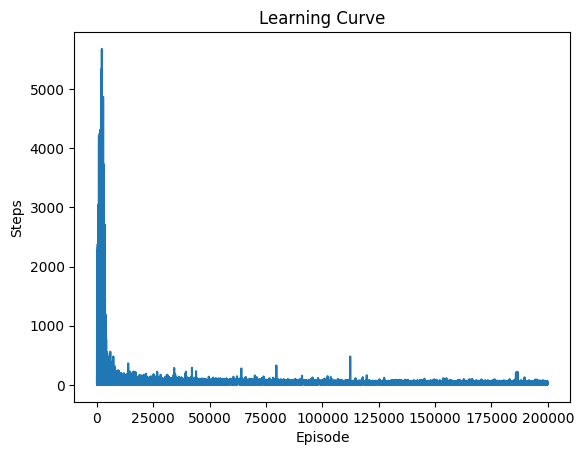

In [18]:
# Example usage:
if __name__ == "__main__":
    env = CheeseEnvironment(size=(15, 10))
    agent = CheeseQLearning(env)
    
    # Train with visualization enabled to see the agent in action.
    steps = agent.train(episodes=200000, visualize=False)
    
    # Plot the learning curve: steps taken per episode.
    plt.figure()
    plt.plot(steps)
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.title("Learning Curve")
    plt.show()

In [19]:

def evaluate_agent(agent, env, episodes=100):
    agent.epsilon = 0.0  # turn off exploration
    successes = 0
    total_steps = 0
    
    for _ in range(episodes):
        state = env.reset()
        done = False
        steps = 0
        
        while not done and steps < 500:
            steps += 1
            # Choose the best (greedy) action
            action = np.argmax(agent.q_table[state[0], state[1], state[2], state[3], :])
            env.move_mouse(action)
            env.move_cat()
            reward = env.get_reward()
            state = env.get_state()
            if env.mouse == env.cheese:
                successes += 1
                done = True
            elif env.mouse == env.cat:
                done = True
        total_steps += steps
    
    avg_steps = total_steps / episodes
    success_rate = successes / episodes
    return success_rate, avg_steps

# After training:
success_rate, avg_steps = evaluate_agent(agent, env, episodes=100)
print(f"Success rate: {success_rate:.2f}, Average steps: {avg_steps:.2f}")


Success rate: 1.00, Average steps: 25.36


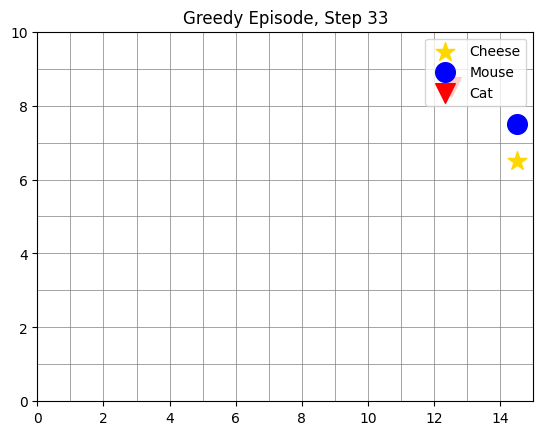

In [25]:
def run_one_episode_greedy(agent, env):
    agent.epsilon = 0.0  # no exploration
    state = env.reset()
    done = False
    step = 0
    
    while not done and step < 200:
        step += 1
        clear_output(wait=True)
        plt.clf()
        ax = plt.gca()
        width, height = env.size
        
        # Draw grid
        for x in range(width+1):
            ax.plot([x, x], [0, height], color='gray', linewidth=0.5)
        for y in range(height+1):
            ax.plot([0, width], [y, y], color='gray', linewidth=0.5)
        
        # Plot cheese, mouse, and cat
        ax.scatter(env.cheese[0]+0.5, env.cheese[1]+0.5, marker='*', s=200, color='gold', label='Cheese')
        ax.scatter(env.mouse[0]+0.5, env.mouse[1]+0.5, marker='o', s=200, color='blue', label='Mouse')
        ax.scatter(env.cat[0]+0.5, env.cat[1]+0.5, marker='v', s=200, color='red', label='Cat')
        
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)
        ax.set_title(f"Greedy Episode, Step {step}")
        ax.legend(loc='upper right')
        plt.pause(0.1)
        
        # Greedy action
        action = np.argmax(agent.q_table[state[0], state[1], state[2], state[3], :])
        env.move_mouse(action)
        env.move_cat()
        reward = env.get_reward()
        state = env.get_state()
        
        if env.mouse == env.cheese or env.mouse == env.cat:
            done = True

    plt.show()

# After training:
run_one_episode_greedy(agent, env)
